In [13]:
import pandas as pd
import numpy as np
import nltk
#importing nltk, which is the natural language toolkit library

In [14]:
nltk.download('vader_lexicon')
#dowloading the vader package

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [15]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()


#getting the sentiment analyzer class
#all steps for downloading vader etc came from:
#https://medium.com/@rslavanyageetha/vader-a-comprehensive-guide-to-sentiment-analysis-in-python-c4f1868b0d2e

In [16]:
#Calabash African Kitchen: Before
calabashBefore = pd.read_csv('/content/Calabash African Kitchen Before.csv')
calabashBefore.head(3)

,Date,Review
0,11-Dec-22,amazingggg !! came to eat with my boyfriend an...
1,11-Dec-22,Food was excellent (seafood empanadas and oxta...
2,10-Dec-22,12/11/22 *Updated* - I am updating my review t...


In [17]:
#testing out vader
negtest = 'I hate Python! Snakes are the worst!'
snakesStink = sentiment.polarity_scores(negtest)
print(snakesStink)
#looking at the compound score for overall sentiment
#this got a score of -0.855, which makes sense bc it is really negative

postest = 'I love Python! The more snakes the better!'
snakesRock = sentiment.polarity_scores(postest)
print(snakesRock)
#this got a score of 0.838, yay!

{'neg': 0.677, 'neu': 0.323, 'pos': 0.0, 'compound': -0.855}
{'neg': 0.0, 'neu': 0.386, 'pos': 0.614, 'compound': 0.838}


In [18]:
#made an empty list, then iterated through the scores and put them into the empty list
#then made a new column 'SentimentScore' in the dataframe
scores = []

for each in calabashBefore['Review']:
  calabashBeforeScores = sentiment.polarity_scores(each)
  #print(calabashBeforeScores['compound'])
  #print(type(calabashBeforeScores['compound']))
  scores.append(calabashBeforeScores['compound'])

#print(scores)

calabashBefore['SentimentScore'] = scores
calabashBefore.head(4)
#https://www.geeksforgeeks.org/adding-new-column-to-existing-dataframe-in-pandas/

#exporting dataframe with sentiment scores column to CSV
#https://www.freecodecamp.org/news/dataframe-to-csv-how-to-save-pandas-dataframes-by-exporting/#:~:text=to_csv()%20Method-,The%20.,format%20for%20storing%20tabular%20data.
calabashBefore.to_csv('calabashBeforeWithScores.csv', index=False)


In [19]:
#cleaning up
#del calabashBefore['Sentiment Score']
#del calabashBefore['Sentiment_Score']
calabashBefore.head(3)

,Date,Review,SentimentScore
0,11-Dec-22,amazingggg !! came to eat with my boyfriend an...,0.8057
1,11-Dec-22,Food was excellent (seafood empanadas and oxta...,0.8801
2,10-Dec-22,12/11/22 *Updated* - I am updating my review t...,0.9722


In [20]:
#counting the total number of pos values to compare to overall total number of reviews
#will repeat this process for negative
totalPositiveScoresBefore = (calabashBefore['SentimentScore']>0).sum()
print(totalPositiveScoresBefore)

positiveRatioBefore = (calabashBefore['SentimentScore']>0).mean()
print(positiveRatioBefore)
# so the positive review proportion here would be 121/126 (0.96031)


print(len(calabashBefore))


totalNegativeScoresBefore = (calabashBefore['SentimentScore']<=0).sum()
print(totalNegativeScoresBefore)
#this is 5, which makes sense


negativeRatioBefore = (calabashBefore['SentimentScore']<=0).mean()
# proportion is 5/126 for negative reviews
print(negativeRatioBefore)

# i love basic addition
# proportion is 5/126 for negative reviews

121
0.9603174603174603
126
5
0.03968253968253968


In [21]:
#Calabash African Kitchen: After
calabashAfter = pd.read_csv('/content/Calabash African Kitchen After.csv')
#calabashAfter.head(5)

calabashAfter = calabashAfter.filter(['Date','Review'], axis=1)
#filtering bc this one had a bunch of empty random columns that we didn't need
#https://stackoverflow.com/questions/34682828/extracting-specific-selected-columns-to-new-dataframe-as-a-copy
calabashAfter.head(5)
#fixed!


,Date,Review
0,20-Sep-24,Don't walk RUN!!! If you love great good plea...
1,17-Sep-24,Absolutely outstanding service by Hawa and Ole...
2,15-Sep-24,Wow thank you to the whole team this is the be...
3,14-Sep-24,I highly recommend Calabash African Kitchen fo...
4,12-Sep-24,The two ladies who greeted us when we walked i...


In [22]:
scoresAfterCalabash = []

#print(type(calabashAfter['Review']))

scoresAsStrings = calabashAfter['Review'].astype(str)
#scoresAsStrings.head(20)

for each in scoresAsStrings:
  calabashAfterScores = sentiment.polarity_scores(each)
  scoresAfterCalabash.append(calabashAfterScores['compound'])


calabashAfter['SentimentScore'] = scoresAfterCalabash
#calabashAfter.head(20)

calabashAfter=calabashAfter.dropna()
#lots of NaN values at the end- no words for the reviews, just stars
#deleted for our purposes
calabashAfter.head(-5)

calabashAfter.to_csv('calabashAfterWithScores.csv', index=False)

In [23]:
#counting the total number of pos and neg values to compare to overall total number of reviews

totalPositiveScoresAfter = (calabashAfter['SentimentScore']>0).sum()
print(totalPositiveScoresAfter)
#total of 347 positive reviews

positiveRatioAfter = (calabashAfter['SentimentScore']>0).mean()
print(positiveRatioAfter)
# so the positive review proportion here would be 347/361 (0.9612)


print(len(calabashAfter))
#total reviews: 361

totalNegativeScoresAfter = (calabashAfter['SentimentScore']<=0).sum()
print(totalNegativeScoresAfter)
#this is 14


negativeRatioAfter = (calabashAfter['SentimentScore']<=0).mean()
print(negativeRatioAfter)

# proportion is 14/361 (0.03878) for negative reviews

347
0.961218836565097
361
14
0.038781163434903045


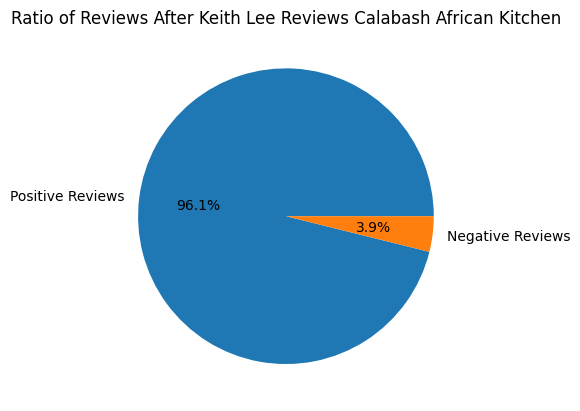

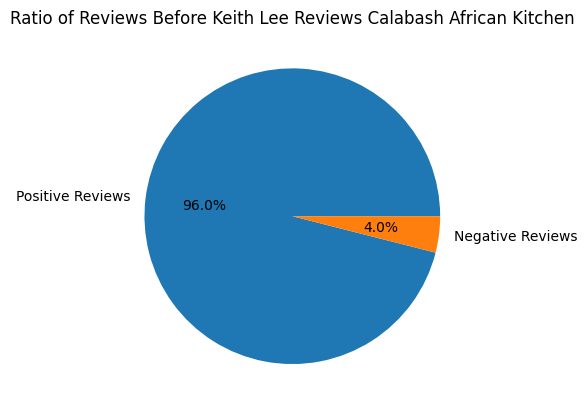

In [24]:
#making a pie chart for before and after
#https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html

import matplotlib.pyplot as plt

#AFTER PIE CHART: CALABASH AFRICAN KITCHEN
values = [positiveRatioAfter, negativeRatioAfter]

plt.pie(values, labels=('Positive Reviews', 'Negative Reviews'), autopct='%1.1f%%')
plt.title('Ratio of Reviews After Keith Lee Reviews Calabash African Kitchen')
plt.show()

#BEFORE PIE CHART: CALABASH AFRICAN KITCHEN
values = [positiveRatioBefore, negativeRatioBefore]

plt.pie(values, labels=('Positive Reviews', 'Negative Reviews'), autopct='%1.1f%%')
plt.title('Ratio of Reviews Before Keith Lee Reviews Calabash African Kitchen')
plt.show()
